<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tuning-and-Optimizing-Neural-Networks---Lab" data-toc-modified-id="Tuning-and-Optimizing-Neural-Networks---Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tuning and Optimizing Neural Networks - Lab</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading the Data</a></span></li><li><span><a href="#Defining-the-Problem" data-toc-modified-id="Defining-the-Problem-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Defining the Problem</a></span></li><li><span><a href="#Generating-a-Hold-Out-Test-Set" data-toc-modified-id="Generating-a-Hold-Out-Test-Set-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Generating a Hold Out Test Set</a></span></li><li><span><a href="#Defining-a-K-fold-Cross-Validation-Methodology" data-toc-modified-id="Defining-a-K-fold-Cross-Validation-Methodology-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Defining a K-fold Cross Validation Methodology</a></span></li><li><span><a href="#Building-a-Baseline-Model" data-toc-modified-id="Building-a-Baseline-Model-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Building a Baseline Model</a></span></li><li><span><a href="#Evaluating-the-Baseline-Model-with-K-Folds-Cross-Validation" data-toc-modified-id="Evaluating-the-Baseline-Model-with-K-Folds-Cross-Validation-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Evaluating the Baseline Model with K-Folds Cross Validation</a></span></li><li><span><a href="#Intentionally-Overfitting-a-Model" data-toc-modified-id="Intentionally-Overfitting-a-Model-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Intentionally Overfitting a Model</a></span></li><li><span><a href="#Regularizing-the-Model-to-Achieve-Balance" data-toc-modified-id="Regularizing-the-Model-to-Achieve-Balance-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Regularizing the Model to Achieve Balance</a></span></li><li><span><a href="#Final-Evaluation" data-toc-modified-id="Final-Evaluation-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Final Evaluation</a></span></li><li><span><a href="#Additional-Resources" data-toc-modified-id="Additional-Resources-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Additional Resources</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Tuning and Optimizing Neural Networks - Lab

## Introduction

Now that we've discussed some regularization, initialization and optimization techniques, its time to synthesize those concepts into a cohesive modelling pipeline.  

With this pipeline, yoiu will not only fit an initial model but will also attempt to set various hyperparameters for regularization techniques. Your final model selection will pertain to the test metrics across these models. This will more naturally simulate a problem you might be faced with in practice, and the various modelling decisions you are apt to encounter along the way.  

Recall that our end objective is to achieve a balance between overfitting and underfitting. We've discussed the bias variance tradeoff, and the role of regularization in order to reduce overfitting on training data and improving generalization to new cases. Common frameworks for such a procedure include train/validate/test methodology when data is plentiful, and K-folds cross-validation for smaller, more limited datasets. In this lab, you'll perform the latter, as the dataset in question is fairly limited. 

## Objectives

You will be able to:

* Implement a K-folds cross validation modelling pipeline
* Apply normalization as a preprocessing technique
* Apply regularization techniques to improve your model's generalization
* Choose an appropriate optimization strategy 

## Loading the Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import time

In [3]:
ls

CONTRIBUTING.md  Loan_clean.csv   index.ipynb      loan_final.csv
LICENSE.md       README.md        index_files/


In [5]:
data = pd.read_csv('loan_final.csv', header=0)
print(f'Before Drop: {data.shape}')
data = data.dropna()
print(f'\nAfter Drop: {data.shape}')
data.head(3)

Before Drop: (42538, 16)

After Drop: (41394, 16)


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,total_acc,total_pymnt,application_type
0,5000.0,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,9.0,5863.155187,Individual
1,2500.0,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,4.0,1014.530000,Individual
2,2400.0,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,10.0,3005.666844,Individual


In [6]:
start = datetime.datetime.now()

In [7]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41394 entries, 0 to 42516
Data columns (total 16 columns):
loan_amnt              41394 non-null float64
funded_amnt_inv        41394 non-null float64
term                   41394 non-null object
int_rate               41394 non-null object
installment            41394 non-null float64
grade                  41394 non-null object
emp_length             41394 non-null object
home_ownership         41394 non-null object
annual_inc             41394 non-null float64
verification_status    41394 non-null object
loan_status            41394 non-null object
purpose                41394 non-null object
addr_state             41394 non-null object
total_acc              41394 non-null float64
total_pymnt            41394 non-null float64
application_type       41394 non-null object
dtypes: float64(6), object(10)
memory usage: 5.4+ MB
None
          loan_amnt  funded_amnt_inv   installment    annual_inc  \
count  41394.000000     41394.000000  4

## Defining the Problem

Set up the problem by defining X and Y. 

For this problem use the following variables for X:
* loan_amnt
* home_ownership
* funded_amnt_inv
* verification_status
* emp_length
* installment
* annual_inc

Be sure to use dummy variables for categorical variables and to normalize numerical quanitities. Be sure to also remove any rows with null data.  

For Y, we are looking to build a model to predict the total payment received for a loan.

In [9]:
X0, X1, X2, X3 = data['loan_amnt'], data['funded_amnt_inv'], \
        data['installment'], data['annual_inc']

# standardized inputs
X0= (X0-np.mean(X0))/(np.std(X0))
X1= (X1-np.mean(X1))/(np.std(X1))
X2= (X2-np.mean(X2))/(np.std(X2))
X3= (X3-np.mean(X3))/(np.std(X3))

dummy_ver = pd.get_dummies(data['verification_status'])
dummy_home = pd.get_dummies(data['home_ownership'])
dummy_emp = pd.get_dummies(data['emp_length'])

X = pd.concat([X0, X1, X2, X3, dummy_ver, dummy_home, dummy_emp], axis=1)
X = X.dropna()
y = data["total_pymnt"]
y = (y-np.mean(y))/np.std(y)

print(np.shape(X))

(41394, 23)


## Generating a Hold Out Test Set

While we will be using K-fold cross validation to select an optimal model, we still want a final hold out test set that is completely independent of any modelling decisions. As such, pull out a sample of 10% of the total available data. For consistency of results, use random seed 123. 

In [11]:
# Your code here; generate a hold out test set for final model evaluation. Use random seed 123.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)  

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.head()

(37254, 23) (4140, 23) (37254,) (4140,)


,loan_amnt,funded_amnt_inv,installment,annual_inc,Not Verified,Source Verified,Verified,MORTGAGE,NONE,OTHER,...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
24882,0.112849,0.021326,-0.286460,0.189661,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5723,-0.669251,-0.559691,-0.587677,-0.151157,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32465,0.841010,1.008356,1.374322,0.468512,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
34510,-0.831064,-0.727696,-0.806909,-0.306075,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9396,0.921917,1.092359,1.162835,0.158677,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Defining a K-fold Cross Validation Methodology

Now that your have a complete holdout test set, write a function that takes in the remaining data and performs k-folds cross validation given a model object. Be sure your function returns performance metrics regarding the training and validation sets.

In [12]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
#Your code here; define a function to evaluate a model object using K folds cross validation.
def k_folds(features_train, labels_train, model_obj, k=10, n_epochs=100):
    colors = sns.color_palette('Set2')
    
    validation_scores = []
    kf = KFold(n_splits=10, shuffle=True)
    
    fig, axes = plt.subplots(2, 5, figsize=(12,8))
    for i, (train_index, test_index) in enumerate(kf.split(features_train)):
        row = i//5
        col = i%5
        X_train, X_val = features_train.iloc[train_index], features_train.iloc[test_index]
        y_train, y_val = labels_train.iloc[train_index], labels_train.iloc[test_index]
        
        model = model_obj
        hist = model.fit(X_train, y_train, batch_size=32, epochs=n_epochs, \
                         verbose=0, validation_data=(X_val, y_val))
        
        validation_score = model.evaluate(X_val, y_val)
        validation_scores.append(validation_score)
        ax = axes[row, col]
        k = 'val_loss'
        d = hist.history[k]
        ax.plot(d, label=k, color=colors[0])

        k = 'loss'
        d = hist.history[k]
        ax.plot(d, label=k, color=colors[1])
        ax.set_title('Fold {} Validation'.format(i+1))
    
    # Graph Formatting:
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    plt.legend(bbox_to_anchor=(1,1))
    
    # General Overview:
    validation_score = np.average(validation_scores)
    print('Mean Validation Score:', validation_score)
    print('Standard Deviation of Validation Scores:', np.std(validation_scores))
    return validation_score

## Building a Baseline Model

Here, it is also important to define your evaluation metric that you will look to optimize while tuning the model.   

In general, model training to optimize this metric may consist of using a validation and test set if data is plentiful, or k-folds cross-validation if data is limited. We set up a k-folds cross-validation for this task since the dataset is not overly large.  

Build an initial sequential model with 2 hidden relu layers. The first should have 7 hidden units, and the second 10 hidden units. Finally, add a third layer with a linear activation function to output our predictions for the total loan payment. 

In [20]:
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(123)
model = Sequential()
model.add(Dense(7, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(optimizer="sgd" ,loss='mse',metrics=['mse'])

## Evaluating the Baseline Model with K-Folds Cross Validation

Use your k-folds function to evaluate the baseline model.  

Note: This code block is likely to take 10-20 minutes to run depending on the specs on your computer.
Because of time dependencies, it can be interesting to begin timing these operations for future reference.

Here's a simple little recipe to achieve this:
```
import time
import datetime

now = datetime.datetime.now()
later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)
```


3725/3725 [==============================] - 0s 9us/step
Mean Validation Score: 0.18683302024948395
Standard Deviation of Validation Scores: 0.01295437271954321
Time Elapsed: 0:10:20.478708


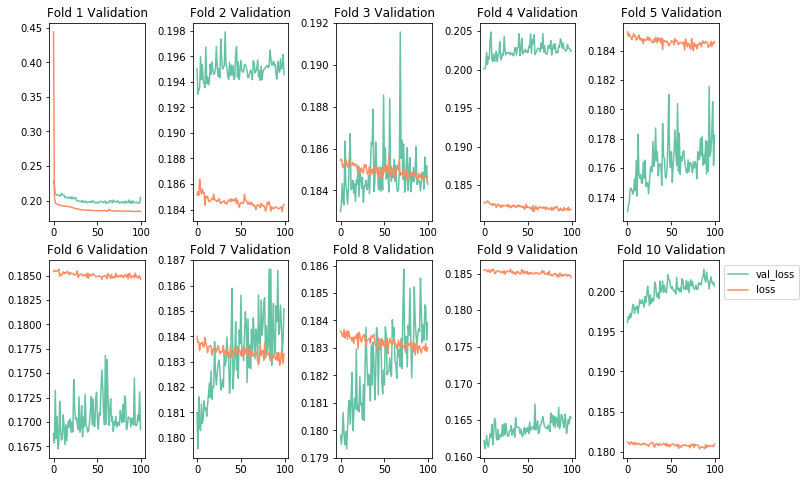

In [21]:
now = datetime.datetime.now()

k_folds(X_train, y_train, model)

later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)

## Intentionally Overfitting a Model

Now that you've developed a baseline model, its time to intentionally overfit a model. To overfit a model, you can:
* Add layers
* Make the layers bigger
* Increase the number of training epochs

Again, be careful here. Think about the limitations of your resources, both in terms of your computers specs and how much time and patience you have to let the process run. Also keep in mind that you will then be regularizing these overfit models, meaning another round of experiments and more time and resources.  

For example, here are some timing notes on potential experiments run on a Macbook Pro 3.1 GHz Intel Core i5 with 16gb of RAM:

* Using our 10 fold cross validation methodology, a 5-layer neural network with 10 units per hidden layer and 100 epochs took approximately 15 minutes to train and validate  

* Using our 10 fold cross validation methodology, a 5-layer neural network with 25 units per hidden layer and 100 epochs took approximately 25 minutes to train and validate  

* Using our 10 fold cross validation methodology, a 5-layer neural network with 10 units per hidden layer and 250 epochs took approximately 45 minutes to train and validate


3725/3725 [==============================] - 0s 9us/step
Mean Validation Score: 0.18703977040048103
Standard Deviation of Validation Scores: 0.009037010854106822
Time Elapsed: 0:11:53.327868


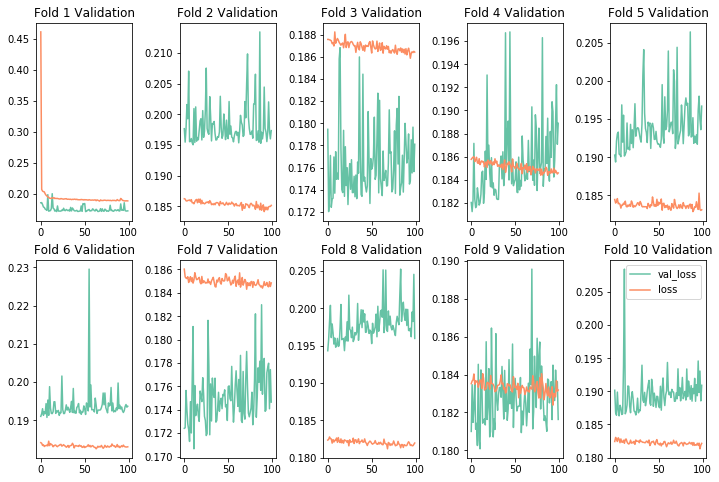

In [22]:
now = datetime.datetime.now()

#Model Mod 1: Adding More Layers
model = Sequential()
model.add(Dense(7, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(optimizer="sgd" ,loss='mse',metrics=['mse'])

k_folds(X_train, y_train, model)    

later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)

3725/3725 [==============================] - 0s 10us/step
Mean Validation Score: nan
Standard Deviation of Validation Scores: nan
Time Elapsed: 0:12:36.032001


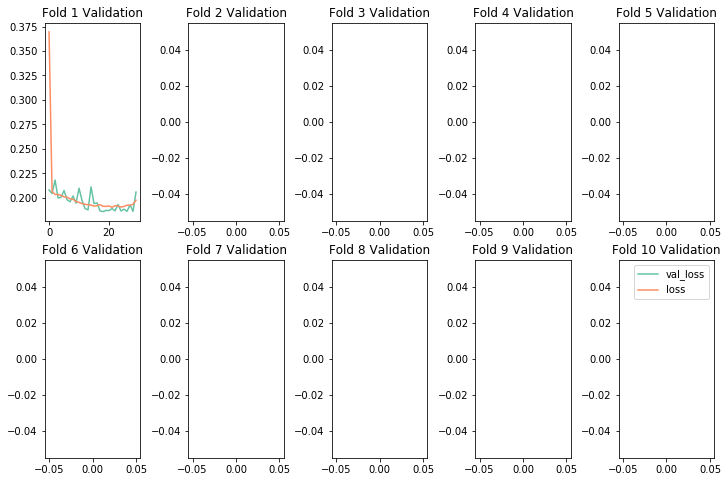

In [23]:
now = datetime.datetime.now()

model = Sequential()
model.add(Dense(7, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(optimizer="sgd", loss='mse',metrics=['mse'])

k_folds(X_train, y_train, model)    

later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)

3725/3725 [==============================] - 0s 8us/step
Mean Validation Score: 0.186016838371842
Standard Deviation of Validation Scores: 0.00755782170142322
Time Elapsed: 0:29:17.505846


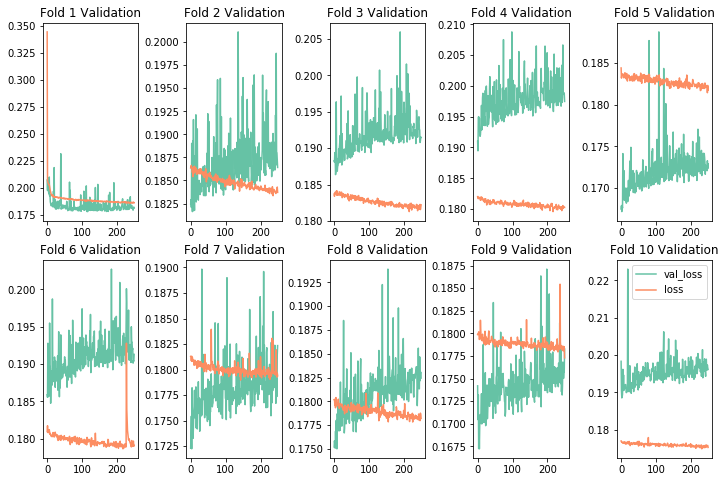

In [25]:
now = datetime.datetime.now()

model = Sequential()
model.add(Dense(7, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(optimizer="sgd", loss='mse',metrics=['mse'])

k_folds(X_train, y_train, model, n_epochs=250)

later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)

## Regularizing the Model to Achieve Balance  

Now that you have a powerful model (albeit an overfit one), we can now increase the generalization of the model by using some of the regularization techniques we discussed. Some options you have to try include:  
* Adding dropout
* Adding L1/L2 regularization
* Altering the layer architecture (add or remove layers similar to above)  

This process will be constrained by time and resources. Be sure to test at least 2 different methodologies, such as dropout and L2 regularization. If you have the time, feel free to continue experimenting.

Notes: 

3725/3725 [==============================] - 0s 10us/step
Mean Validation Score: 0.19769713579273435
Standard Deviation of Validation Scores: 0.01016256452282177
Time Elapsed: 0:26:24.843815


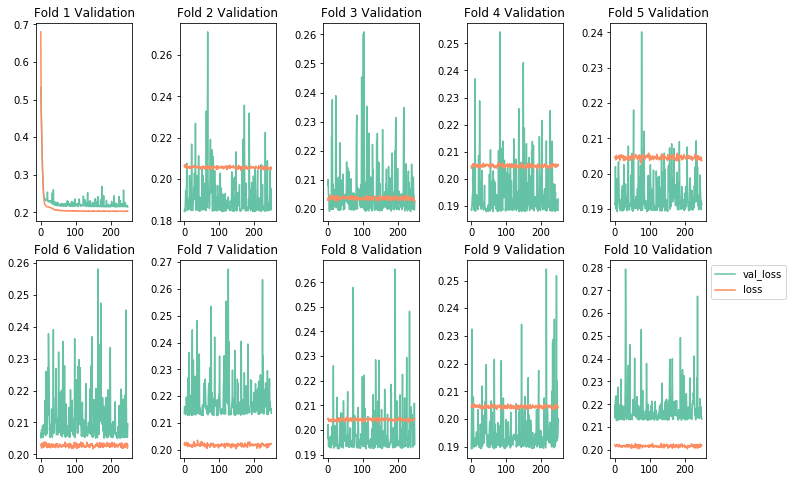

In [26]:
# L1 Regularization
from keras import regularizers

now = datetime.datetime.now()

model = Sequential()
model.add(Dense(7, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(optimizer="sgd" ,loss='mse',metrics=['mse'])

k_folds(X_train, y_train, model, n_epochs=250) 

later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)

3725/3725 [==============================] - 0s 9us/step
Mean Validation Score: 0.19553411376257812
Standard Deviation of Validation Scores: 0.014385512060960004
Time Elapsed: 0:16:08.203264


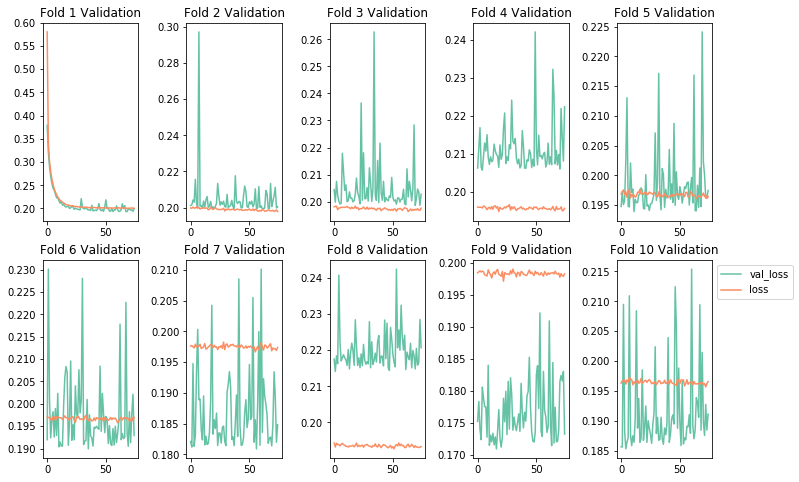

In [27]:
# L2 Regularization and Early Stopping
now = datetime.datetime.now()


model = Sequential()
model.add(Dense(7, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(optimizer="sgd" ,loss='mse',metrics=['mse'])

k_folds(X_train, y_train, model, n_epochs=75) 

later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
3725/3725 [==============================] - 0s 10us/step
Mean Validation Score: 0.3503496987425384
Standard Deviation of Validation Scores: 0.019474112304198987
Time Elapsed: 0:10:12.743414


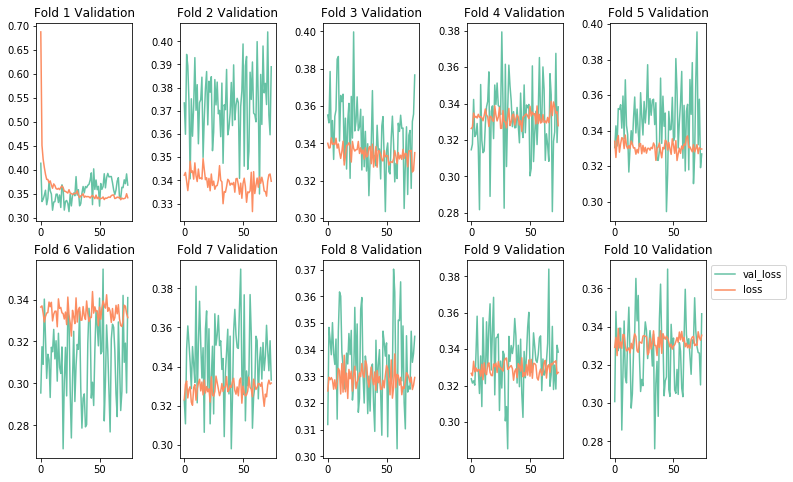

In [28]:
# Dropout and Early Stopping
from keras import layers

now = datetime.datetime.now()


model = Sequential()
model.add(Dense(7, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(optimizer="sgd" ,loss='mse',metrics=['mse'])

k_folds(X_train, y_train, model, n_epochs=75) 

later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)

3725/3725 [==============================] - 0s 86us/step
Mean Validation Score: 0.40338035111507475
Standard Deviation of Validation Scores: 0.0781889628391546
Time Elapsed: 1:50:05.325122


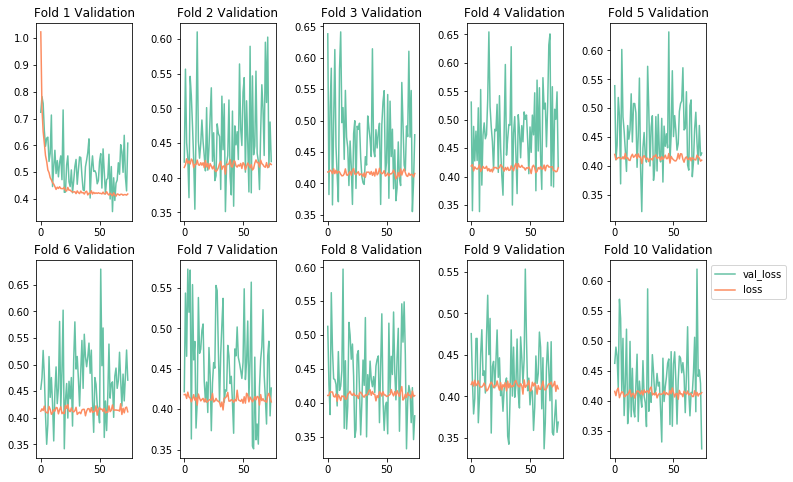

In [29]:
# L1, Dropout and Early Stopping

now = datetime.datetime.now()


model = Sequential()
model.add(Dense(7, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(10, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(10, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(optimizer="sgd" ,loss='mse',metrics=['mse'])

k_folds(X_train, y_train, model, n_epochs=75) 

later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)

In [30]:
end = datetime.datetime.now()
elapsed = end - start
print('Total Time Elapsed:', elapsed)

Total Time Elapsed: 6:26:00.984646


## Final Evaluation

Now that you have selected a network architecture, tested various regularization procedures and tuned hyperparameters via a validation methodology, it is time to evaluate your finalized model once and for all. Fit the model using all of the training and validation data using the architecture and hyperparameters that were most effective in your expirements above. Afterwards, measure the overall performance on the hold-out test data which has been left untouched (and hasn't leaked any data into the modelling process)!

In [31]:
#Based on our model runs above, it appears that using  L2 Regularization and Early Stopping
#improves our variance 10 fold in exchange for a slight increase in MSE
#As such, we will choose this as our final model in hopes that the model will have improved generalization
now = datetime.datetime.now()


model = Sequential()
model.add(Dense(7, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
model.compile(optimizer="sgd" ,loss='mse',metrics=['mse'])

hist =  hist = model.fit(X_train, y_train, batch_size=32, epochs=75)

later = datetime.datetime.now()
elapsed = later - now
print('Time Elapsed:', elapsed)

Epoch 1/75
37254/37254 [==============================] - 1s 31us/step - loss: 0.5913 - mean_squared_error: 0.4611
Epoch 2/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.3116 - mean_squared_error: 0.2041
Epoch 3/75
37254/37254 [==============================] - 1s 20us/step - loss: 0.2901 - mean_squared_error: 0.2029
Epoch 4/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.2728 - mean_squared_error: 0.2018
Epoch 5/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.2601 - mean_squared_error: 0.2017
Epoch 6/75
37254/37254 [==============================] - 1s 20us/step - loss: 0.2492 - mean_squared_error: 0.2010
Epoch 7/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.2410 - mean_squared_error: 0.2008
Epoch 8/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.2345 - mean_squared_error: 0.2007
Epoch 9/75
37254/37254 [==============================] - 1s 20us/step - loss: 0

37254/37254 [==============================] - 1s 19us/step - loss: 0.1984 - mean_squared_error: 0.1915
Epoch 71/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.1988 - mean_squared_error: 0.1919
Epoch 72/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.1983 - mean_squared_error: 0.1915
Epoch 73/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.1982 - mean_squared_error: 0.1914
Epoch 74/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.1984 - mean_squared_error: 0.1916
Epoch 75/75
37254/37254 [==============================] - 1s 19us/step - loss: 0.1975 - mean_squared_error: 0.1907
Time Elapsed: 0:00:55.802740


In [32]:
model.evaluate(X_test, y_test)

4140/4140 [==============================] - 0s 50us/step


[0.1858263982090973, 0.17911787722709674]

In [33]:
model.evaluate?

## Additional Resources

https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network
https://www.springboard.com/blog/free-public-data-sets-data-science-project/

## Summary

In this lab, we investigated some data from *The Lending Club* in a complete data science pipeline regarding neural networks. We began with reserving a hold-out set for testing which never was touched during the modeling phase. From there, we implemented a k-fold cross validation methodology in order to assess an initial baseline model and various regularization methods. From here, we'll begin to investigate other neural network architectures such as CNNs.